# Linear Regression
**Sibt ul Hussain**

hypothesis: line will fit data and allow us to make a prediction for an unknown point

  y = mx + c
  
goal: to find optimial value for m and c  
  
1- randomly initialize m and c values

2- determine how optimal these m and c values are using some cost function
   -> mean squared error or absolute error are examples of cost functions
   -> squared error adds penatly relative to how incorrect the values of m and c are  
    
3- find gradient of cost function
   analytical (difficult to compute gradient)
   numerical gradient (computationally expensive, unsuitable for real world applications)
    
4- learning rate too large -> can oscillate, too small -> slow convergence

5- gradient descent can get stuck in a local minima. you know you are stuck if results are poor.
   to get unstuck, simply take some random point and start gradient descent again.


In [8]:
import numpy as np

In [9]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [10]:
f = lambda x: x**4-4*x**3+2

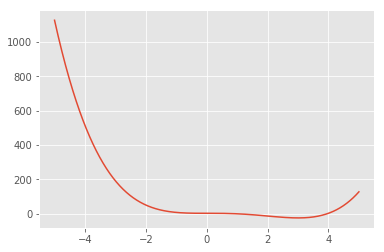

In [11]:
x = np.linspace(-5, 5, 1000)
y = f(x)
plt.plot(x, y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [12]:
minimum =+ np.inf
x =+ np.inf


step_size = 0.001
max_range = 5
curr_point = -5  

while(curr_point < max_range):

  if (f(curr_point) < minimum):
    minimum = f(curr_point)
    x = curr_point
    
  curr_point += step_size
    

print("Local minimum occurs at {}".format(x))
print("Local minimum value is {}".format(minimum))

Local minimum occurs at 2.9999999999997846
Local minimum value is -25.0


### Gradient Descent

In [13]:
def f_derivative(x):
    return 4*x**3 - 12*x**2
  
import random

In [14]:
x_old = 0
x_new = np.random.rand(1, 1) 

eps = 0.01 # step size
precision = 0.00001

while(True):
  dev_x_new = f_derivative(x_new)
  dev_x_old = f_derivative(x_old)
  
  if (abs(dev_x_new - dev_x_old) < precision):
    break
    
  x_old = x_new
  x_new += eps

  
print ("Local minimum occurs at ", x_new)

Local minimum occurs at  [[0.41075949]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [15]:
eps = 0.00001
x = 1.5
dfx = (f(x+eps)- f(x))/eps
cdfx = f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 -13.5 -4.499993673157121e-05


### Let's generate some random data

In [16]:
X = np.arange(0, 5, 0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

rx = X
ry = Y

Text(0, 0.5, 'Y')

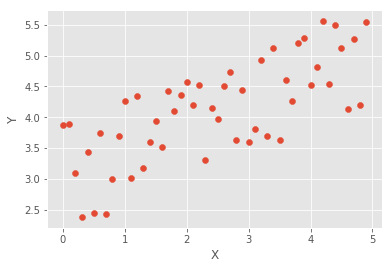

In [17]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [18]:
cf = lambda t0,t1,x,y: np.dot(t1*x+t0-y, t1*x+t0-y)
#square error

In [19]:
t0 = arange(-5, +5, 0.01)
t1 = arange(-5, +5, 0.01)

In [20]:
ecf = np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j] = cf(t0[i], t1[j], X, Y)

In [21]:
print (ecf)

[[25885.62168156 25822.06271816 25758.58752836 ...  2660.97644045
   2678.02646174  2695.15648778]
 [25864.25334633 25800.71879434 25737.26799512 ...  2664.03498559
   2681.10950469  2698.26403737]
 [25842.89496351 25779.38523963 25715.95916056 ...  2667.10356322
   2684.2025675   2701.38160917]
 ...
 [ 9546.76162051  9507.62950965  9468.58006276 ... 10675.33535859
  10716.81266395 10758.36841088]
 [ 9535.36333449  9496.25573662  9457.2307777  ... 10688.3641315
  10729.86593816 10771.44618491]
 [ 9523.97522243  9484.89216697  9445.89173581 ... 10701.40266524
  10742.92884168 10784.53371109]]


In [22]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


Text(0.5, 0, '$J(\\theta_0,\\theta_1)$(Cost Function)')

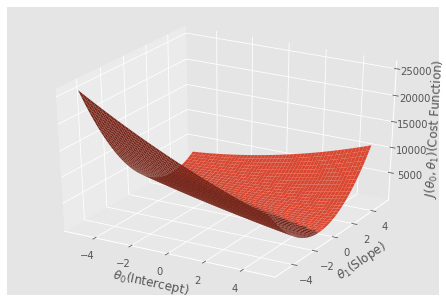

In [23]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
ax.set_xlabel(r'$\theta_0$(Intercept)')
ax.set_ylabel(r'$\theta_1$(Slope)')
ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [48]:
def hyp(theta, X):
    return np.dot(X, theta.T)  

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [49]:
def cost_function(theta, X, Y):
  return np.sum(((hyp(theta, X) - Y)**2) / (2 * X.shape[0]))

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [50]:
def derivative_cost_function(theta, X, Y):
  result = []
  
  for i in range(0, X.shape[1]):
    result.append(np.sum((hyp(theta, X) - Y) * X[:, -i]) / X.shape[0])
    
  return result

In [89]:
def GradientDescent(X, Y, cost_function, derivative_cost_function, maxniter):
    theta_new = np.random.rand(X.shape[1],)
    
    alpha = 0.001
    cf = []
    
    for i in range(0, maxniter):
      theta_new = theta_new - (alpha * np.array(derivative_cost_function(theta_new, X, Y)))
      print(cost_function(theta_new, X, Y))
      cf.append(cost_function(theta_new, X, Y))
      
    return theta_new, cf

In [52]:
import numpy as np
import pandas as pd
from pyproj import Geod
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("error")

In [53]:
wgs84_geod = Geod(ellps='WGS84')
def get_distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2)
    return dist

In [88]:
train_data = pd.read_csv( "train.csv" )
test_data = pd.read_csv( "test.csv" )

def normalize(data):
  return (data - data.min()) / (data.max() - data.min())

def process_data(data):
#    Processes the data i.e adds column, removes etc. 
  return data

6021904.455997812
6003156.218882982
5985118.703366438
5967765.918505089
5951072.834027887
5935015.344935035
5919570.237402844
5904715.155946093
5890428.571791527
5876689.752417834
5863478.732219091
5850776.28425025
5838563.893014781
5826823.728256019
5815538.619715226
5804692.032820736
5794268.045273813
5784251.3244981915
5774627.105921448
5765381.172057527
5756499.83236088
5747969.903823775
5739778.692289375
5731913.974454189
5724363.98053448
5717117.377572156
5710163.253356553
5703491.100939424
5697090.803721231
5690952.621087721
5685067.174576438
5679425.434553706
5674018.707383193
5668838.623067976
5663877.123348642
5659126.450240598
5654579.134994419
5650227.987463611
5646066.085864808
5642086.766915894
5638283.616338142
5634650.459708951
5631181.353652248
5627870.577354107
5624712.624391606
5621702.194863366
5618834.187810656
5616103.693918351
5613505.988485442
5611036.524655119
5608690.926894924
5606464.984717704
5604354.646634508
5602356.014330888
5600465.337058349
5598679.0062

10884929.952611241
10942052.391638359
10999775.671930442
11058106.111174567
11117050.093489831
11176614.070125915
11236804.560168957
11297628.151254868
11359091.500290152
11421201.334180277
11483964.45056575
11547387.718565885
11611478.079530433
11676242.54779908
11741688.211468969
11807822.233170245
11874651.850849796
11942184.37856324
12010427.207275178
12079387.805667944
12149073.720958795
12219492.579725739
12290652.088741995
12362560.035819307
12435224.290660033
12508652.805718256
12582853.617069943
12657834.845292218
12733604.696351934
12810171.462503541
12887543.523196423
12965729.34599176
13044737.487489052
13124576.594262354
13205255.403806398
13286782.745492615
13369167.54153525
13452418.807967609
13536545.655628596
13621557.291159593
13707463.018011864
13794272.237464504
13881994.44965312
13970639.254609339
14060216.353311213
14150735.548744705
14242206.746976305
14334639.958236959
14428045.298017345
14522432.988174733
14617813.358051423
14714196.845604984
14811593.998550348

639466290.9012151
646133123.3928988
652870058.9340589
659677834.670812
666557195.5004988
673508894.1531913
680533691.2740544
687632355.5065749
694805663.5766648
702054400.3776506
709379359.0561544
716781341.0988778
724261156.4203014
731819623.4513026
739457569.2287087
747175829.4857886
754975248.7436975
762856680.403885
770820986.8414705
778869039.4996045
787001718.9848202
795219915.1633878
803524527.2586831
811916463.9495784
820396643.4698691
828965993.7087451
837625452.3123196
846375966.7862247
855218494.599286
864154003.2882868
873183470.5638354
882307884.4173446
891528243.2291353
900845555.8776786
910260841.8499863
919775131.3531599
929389465.4271156
939104896.0584931
948922486.2957623
958843310.3655398
968868453.7901306
978999013.5063031
989236097.985314
999580827.3541971
1010034333.5183246
1020597760.2852585
1031272263.4899042
1042059011.1209817
1052959183.4488232
1063973973.1545173
1075104585.460411
1086352238.261982
1097718162.2610993
1109203601.1006863
1120809811.5007956
11325

80439380498.15076
81285157908.49503
82139828821.47333
83003486753.8758
83876226205.83858
84758142671.18376
85649332647.86836
86549893648.54283
87459924211.22083
88379523910.06104
89308793366.26245
90247834259.07417
91196749336.92104
92155642428.64618
93124618454.87178
94103783439.4794
95093244521.21085
96093109965.39127
97103489175.77527
98124492706.5177
99156232274.27045
100198820770.4061
101252372273.37062
102317002061.16537
103392826623.96085
104479963676.84262
105578532172.6919
106688652315.20078
107810445572.02512
108944034688.07504
110089543698.94571
111247097944.48892
112416824082.5278
113598850102.71536
114793305340.539
116000320491.4722
117220027625.27496
118452560200.44473
119698053078.81929
120956642540.33295
122228466297.92825
123513663512.62427
124812374808.74341
126124742289.29822
127450909551.54013
128791021702.6718
130145225375.72427
131513668745.6015
132896501545.29346
134293875082.25937
135705942254.98401
137132857569.70734
138574777157.3304
140031858790.49896
1415042

17579368329886.348
17764218513087.61
17951012429429.09
18139770517616.637
18330513431272.79
18523262041196.664
18718037437647.617
18914860932652.89
19113754062339.56
19314738589290.96
19517836504927.95
19723070031915.145
19930461626592.51
20140033981432.49
20351810027522.97
20565812937076.395
20782066125965.215
21000593256284.01
21221418238938.582
21444565236262.21
21670058664659.516
21897923197278.008
22128183766707.824
22360865567709.793
22595994059972.21
22833594970896.62
23073694298412.836
23316318313823.613
23561493564679.22
23809246877682.195
24059605361622.754
24312596410344.906
24568247705743.92
24826587220795.2
25087643222615.03
25351444275553.555
25618019244320.227
25887397297142.164
26159607908955.633
26434680864631.234
26712646262232.844
26993534516310.94
27277376361230.5
27564202854533.93
27854045380339.285
28146935652774.34
28442905719446.64
28741987964950.125
29044215114408.617
29349620237056.527
29658236749857.258
29970098421159.64
30285239374392.78
30603694091799.848
3

3723388958790046.5
3762541067687748.0
3802104868098300.5
3842084689032490.5
3882484905021439.5
3923309936595250.0
3964564250766704.0
4006252361520030.0
4048378830304816.0
4090948266535122.0
4133965328093828.0
4177434721842295.0
4221361204135386.5
4265749581341897.0
4310604710370460.0
4355931499200978.5
4401734907421659.0
4448019946771669.5
4494791681689529.0
4542055229867239.0
4589815762810260.0
4638078506403371.0
4686848741482473.0
4736131804412414.0
4785933087670884.0
4836258040438451.0
4887112169194806.0
4938501038321268.0
4990430270709634.0
5042905548377426.0
5095932613089610.0
5149517266986847.0
5203665373220361.0
5258382856593468.0
5313675704209871.0
5369549966128744.0
5426011756026734.0
5483067251866903.0
5540722696574713.0
5598984398721115.0
5657858733212830.0
5717352141989874.0
5777471134730431.0
5838222289563128.0
5899612253786807.0
5961647744597854.0
6024335549825200.0
6087682528673022.0
6151695612471273.0
6216381805434090.0
6281748185426193.0
6347801904737333.0
641455019086

2.799834041630899e+17
2.8292748034381462e+17
2.8590251401855226e+17
2.889088307109566e+17
2.919467593676216e+17
2.950166323940744e+17
2.9811878569114605e+17
3.012535586917261e+17
3.0442129439790195e+17
3.076223394184904e+17
3.108570440069624e+17
3.14125762099768e+17
3.174288513550625e+17
3.207666731918419e+17
3.241395928294883e+17
3.275479793277315e+17
3.3099220562703136e+17
3.344726485893842e+17
3.379896890395583e+17
3.415437118067636e+17
3.451351057667585e+17
3.4876426388440064e+17
3.524315832566441e+17
3.561374651559897e+17
3.598823150743907e+17
3.6366654276762214e+17
3.674905623001148e+17
3.713547920902624e+17
3.752596549562032e+17
3.792055781620852e+17
3.831929934648163e+17
3.872223371613059e+17
3.912940501362052e+17
3.9540857791014656e+17
3.995663706884928e+17
4.0376788341059776e+17
4.0801357579958464e+17
4.1230391241264877e+17
4.1663936269188806e+17
4.2102040101566976e+17
4.2544750675053504e+17
4.299211643036509e+17
4.344418631758137e+17
4.390100980150095e+17
4.436263686705368e+

3.2668225985263366e+19
3.3011738295498633e+19
3.3358862699862827e+19
3.3709637180179575e+19
3.4064100117658354e+19
3.44222902970939e+19
3.478424691111016e+19
3.5150009564448604e+19
3.5519618278301716e+19
3.5893113494692065e+19
3.627053608089741e+19
3.6651927333922333e+19
3.703732898501691e+19
3.742678320424286e+19
3.78203326050877e+19
3.821802024912755e+19
3.861988965073873e+19
3.902598478185915e+19
3.943635007679958e+19
3.9851030437105656e+19
4.0270071236470825e+19
4.069351832570119e+19
4.112141803773236e+19
4.155381719269917e+19
4.199076310305861e+19
4.243230357876676e+19
4.2878486932510015e+19
4.332936198499143e+19
4.378497807027257e+19
4.424538504117163e+19
4.471063327471816e+19
4.518077367766535e+19
4.5655857692060066e+19
4.6135937300871635e+19
4.662106503367971e+19
4.711129397242201e+19
4.76066777572024e+19
4.810727059216015e+19
4.861312725140091e+19
4.9124303084989915e+19
4.964085402500839e+19
5.016283659167351e+19
5.069030789952276e+19
5.122332566366331e+19
5.1761948206087184e+

3.732786305526992e+21
3.7720372292840645e+21
3.811700883610123e+21
3.851781608441818e+21
3.8922837893510196e+21
3.9332118580246793e+21
3.974570292749741e+21
4.0163636189031443e+21
4.058596409446988e+21
4.1012732854288935e+21
4.144398916487636e+21
4.18797802136409e+21
4.23201536841754e+21
4.276515776147434e+21
4.3214841137206143e+21
4.366925301504092e+21
4.412844311603432e+21
4.4592461684067837e+21
4.506135949134652e+21
4.553518784395436e+21
4.601399858746804e+21
4.6497844112629915e+21
4.698677736108047e+21
4.748085183115114e+21
4.798012158371798e+21
4.848464124811698e+21
4.899446602812141e+21
4.950965170798228e+21
5.003025465853207e+21
5.05563318433528e+21
5.10879408250088e+21
5.162513977134526e+21
5.216798746185275e+21
5.271654329409882e+21
5.327086729022721e+21
5.383102010352538e+21
5.439706302506107e+21
5.496905799038868e+21
5.554706758632624e+21
5.613115505780339e+21
5.672138431478177e+21
5.731781993924777e+21
5.792052719227906e+21
5.852957202118539e+21
5.914502106672439e+21
5.9766

4.4011810272038006e+23
4.447460242460262e+23
4.494226092043171e+23
4.5414836930005676e+23
4.5892382161871795e+23
4.637494886830204e+23
4.6862589851010495e+23
4.7355358466930855e+23
4.7853308634054587e+23
4.835649483733062e+23
4.886497213462702e+23
4.937879616275523e+23
4.98980231435579e+23
5.042270989006049e+23
5.095291381268776e+23
5.148869292554543e+23
5.203010585276806e+23
5.2577211834933594e+23
5.313007073554539e+23
5.3688743047582386e+23
5.42532899001181e+23
5.482377306500939e+23
5.5400254963655316e+23
5.5982798673827294e+23
5.6571467936570884e+23
5.716632716318031e+23
5.77674414422462e+23
5.837487654677749e+23
5.898869894139823e+23
5.960897578962002e+23
6.023577496119093e+23
6.086916503952173e+23
6.150921532919016e+23
6.215599586352417e+23
6.280957741226479e+23
6.347003148930972e+23
6.41374303605382e+23
6.481184705171834e+23
6.549335535649737e+23
6.618202984447608e+23
6.687794586936812e+23
6.758117957724512e+23
6.829180791486837e+23
6.900990863810832e+23
6.973556032045247e+23
7.0

6.396791314258665e+25
6.4640547329531935e+25
6.532025438672141e+25
6.600710868666608e+25
6.670118538391739e+25
6.740256042329053e+25
6.811131054817414e+25
6.882751330892745e+25
6.955124707136587e+25
7.028259102533543e+25
7.102162519337775e+25
7.176843043948602e+25
7.252308847795291e+25
7.328568188231166e+25
7.405629409437119e+25
7.483500943334616e+25
7.562191310508297e+25
7.641709121138298e+25
7.722063075942358e+25
7.80326196712783e+25
7.885314679353735e+25
7.968230190702877e+25
8.052017573664229e+25
8.136685996125634e+25
8.222244722376928e+25
8.308703114123638e+25
8.396070631511315e+25
8.48435683416066e+25
8.573571382213506e+25
8.663724037389828e+25
8.754824664055865e+25
8.84688323030344e+25
8.939909809040669e+25
9.033914579094129e+25
9.128907826322588e+25
9.224899944742487e+25
9.321901437665236e+25
9.419922918846458e+25
9.518975113647348e+25
9.619068860208203e+25
9.720215110634332e+25
9.82242493219442e+25
9.92570950853148e+25
1.0030080140886553e+26
1.0135548249335287e+26
1.0242125374

,0
count,3.000000e+04
mean,6.622141e+12
std,6.462752e+13
min,-6.335459e+14
25%,-1.175669e+13
50%,9.013711e+12
75%,2.262262e+13
max,1.896719e+14


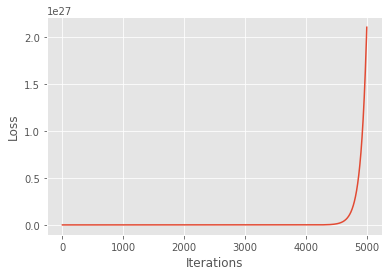

In [90]:
proc_data = process_data(train_data)

# Confirm if normalize is working correctly
X = normalize(proc_data.drop('trip_duration', axis=1)).values
Y = proc_data['trip_duration'].values


max_iters = 5000
thetas, costs = GradientDescent(X, Y, cost_function, derivative_cost_function, max_iters)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.plot(np.arange(0, max_iters), costs)

pred = hyp(thetas, process_data(test_data))
pd.DataFrame(pred).describe()

In [94]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def mlrgradientDescent(X, y, iters, alpha):
    cost = np.zeros(iters)
    theta = np.ones(X.shape[1],)
    
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X[:, i] * ( X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta, cost

#set hyper parameters
alpha = 0.01
iters = 2500

g, cost = mlrgradientDescent(X, Y, iters, alpha)



IndexError: index 4 is out of bounds for axis 1 with size 4